In [1]:
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, SeparableConv1D, MaxPool2D, LeakyReLU, Dense, Activation, Flatten, InputLayer, Dropout
import tensorflow
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)

MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
one_hot_encoded_Y_train = pd.get_dummies(Y_train)


In [6]:
one_hot_encoded_Y_test = pd.get_dummies(Y_test)

In [7]:
one_hot_encoded_Y_test.shape

(10000, 10)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
# reshaping image as it is greyscaled 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [10]:
#normalization to improve performance
X_train = X_train.astype('float32')/255.0

X_test = X_test.astype('float32')/255.0

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [13]:
shape = X_train.shape[1:]

shape

(28, 28, 1)

In [14]:
model_cnn = Sequential()

model_cnn.add(Conv2D(32,(3,3),input_shape=shape ,activation='relu'))
model_cnn.add(MaxPool2D((2,2)))

model_cnn.add(Conv2D(64, (3,3), activation='relu'))
model_cnn.add(MaxPool2D((2,2)))

model_cnn.add(Conv2D(128, (3,3), activation='relu'))
model_cnn.add(MaxPool2D((2,2)))

model_cnn.add(Dropout(0.5))
model_cnn.add(Flatten())
model_cnn.add(Dense(400, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))


model_cnn.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


In [15]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

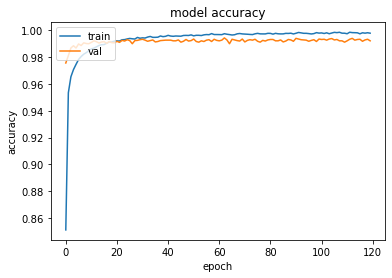

In [16]:
history = model_cnn.fit(X_train,one_hot_encoded_Y_train,epochs=120,batch_size=128,validation_split = 0.1,verbose=0)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
loss, accuracy= model_cnn.evaluate(X_test, one_hot_encoded_Y_test, verbose = 0)

print(f'Accuracy: {accuracy*100}')


Accuracy: 99.05999898910522


In [ ]:
predictions = model_cnn.predict(X_test)

predictions = np.argmax(predictions, axis=1)

fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predictions[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()